In [335]:
#Librerias para analisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias para Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [336]:
# Cargar el dataset
df = pd.read_csv('AND/car details v4.csv')


In [337]:
# Exploración inicial
print(df.head())
print(df.info())
print(df.describe())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

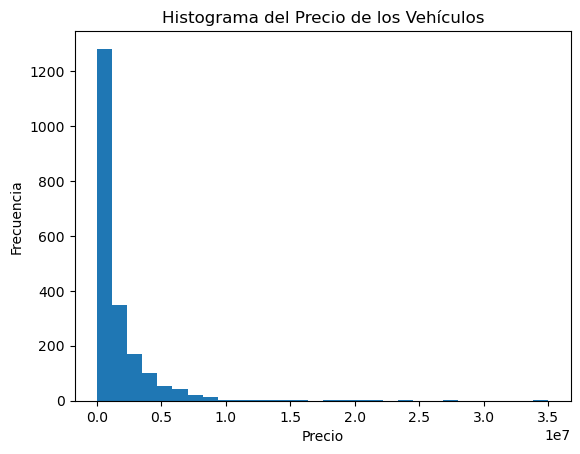

In [338]:
# Visualizaciones
# Histograma del precio
plt.hist(df['Price'], bins=30)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio de los Vehículos')
plt.show()


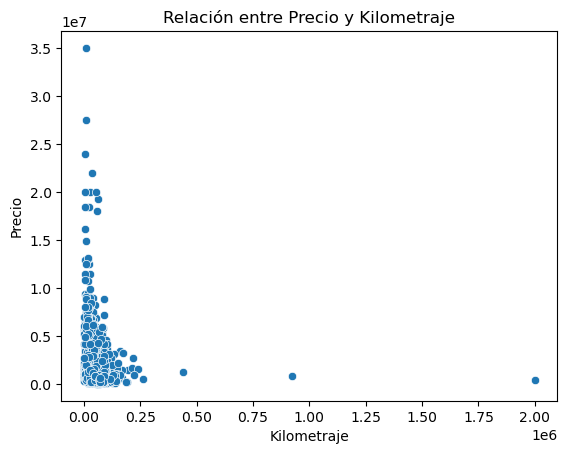

In [339]:
# Diagrama de dispersión entre precio y kilometraje
sns.scatterplot(x='Kilometer', y='Price', data=df)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Relación entre Precio y Kilometraje')
plt.show()

In [340]:
# Función para detectar datos atipicos utilizando el método de los cuartiles
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterar sobre las columnas numéricas y detectar outliers
for column in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers(df[column])
       
# Eliminar filas con outliers
df_clean = df[~df.isin(outliers).any(axis=1)]


In [359]:
def reemplazar_ceros_por_media(df):

  # Seleccionar solo las columnas numéricas
  numeric_cols = df.select_dtypes(include=np.number).columns

  # Iterar sobre cada columna numérica
  for col in numeric_cols:
    # Calcular la media de la columna
    mean_value = df[col].mean()
    # Reemplazar los ceros y NaN por la media
    df[col] = df[col].fillna(mean_value)
    df[col] = df[col].replace(0, mean_value)
  return df

df_cleanCeros = reemplazar_ceros_por_media(df_clean)

In [363]:
def imputar_por_modelo_y_moda(df, columna_referencia, columnas_a_imputar):

  for col in columnas_a_imputar:
    # Agrupar por modelo y calcular la moda
    moda_por_modelo = df.groupby('Make')[col].agg(pd.Series.mode)
    
    # Unir la moda por modelo al DataFrame original
    df = df.merge(moda_por_modelo.to_frame(name=f'{col}_moda'), left_on=columna_referencia, right_index=True, how='left')
    print(df)

    # Imputar los valores faltantes con la moda
    df[col] = df[col].fillna(df[f'{col}_moda'])

    # Eliminar la columna auxiliar
    df.drop(f'{col}_moda', axis=1, inplace=True)

  return df

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado 'df'
df_cleanModa = imputar_por_modelo_y_moda(df_cleanCeros, 'Make', ['Engine', 'Max Power', 'Drivetrain','Max Torque'])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [343]:
desviacion_estandar = df_clean['Price'].std()

print(desviacion_estandar)

2179275.1283318736


In [344]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2009 non-null   object 
 1   Model               2009 non-null   object 
 2   Price               2009 non-null   int64  
 3   Year                2009 non-null   int64  
 4   Kilometer           2009 non-null   float64
 5   Fuel Type           2009 non-null   object 
 6   Transmission        2009 non-null   object 
 7   Location            2009 non-null   object 
 8   Color               2009 non-null   object 
 9   Owner               2009 non-null   object 
 10  Seller Type         2009 non-null   object 
 11  Engine              2009 non-null   object 
 12  Max Power           2009 non-null   object 
 13  Max Torque          2009 non-null   object 
 14  Drivetrain          2009 non-null   object 
 15  Length              2009 non-null   float64
 16  Width      

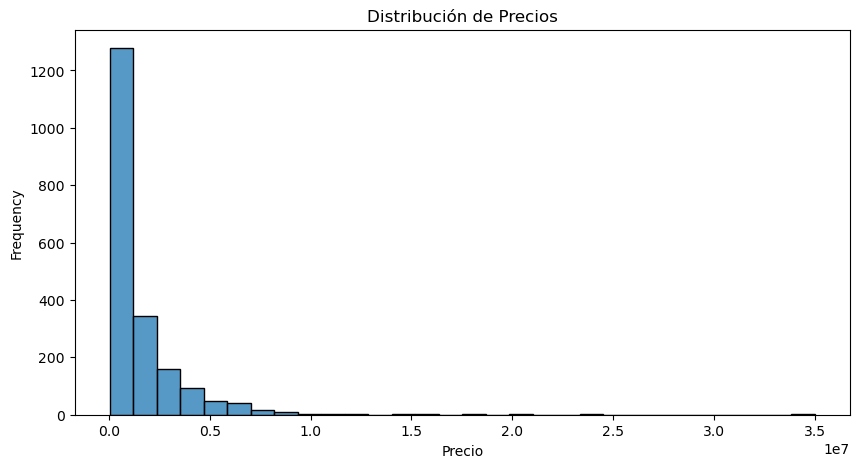

In [345]:
# Análisis de la variable dependiente (Price)
plt.figure(figsize=(10,5))
sns.histplot(df_clean['Price'], bins=30)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frequency')
plt.show()